In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
lorenz = np.loadtxt('lorenz.txt')

In [11]:
ds_size = 1000
white_noise = np.random.standard_normal(size=ds_size)
random_walk = np.random.standard_normal(size=ds_size).cumsum()

r = 0.8
ar1 = np.zeros(ds_size)
for i in range(1, ds_size):
    ar1[i] = r*ar1[i-1] + white_noise[i]

r1 = 0.5
r2 = 0.3
ar2 = np.zeros(ds_size)
for i in range(2, ds_size):
    ar2[i] = r1*ar2[i-1] + r2*ar2[i-2] + white_noise[i]

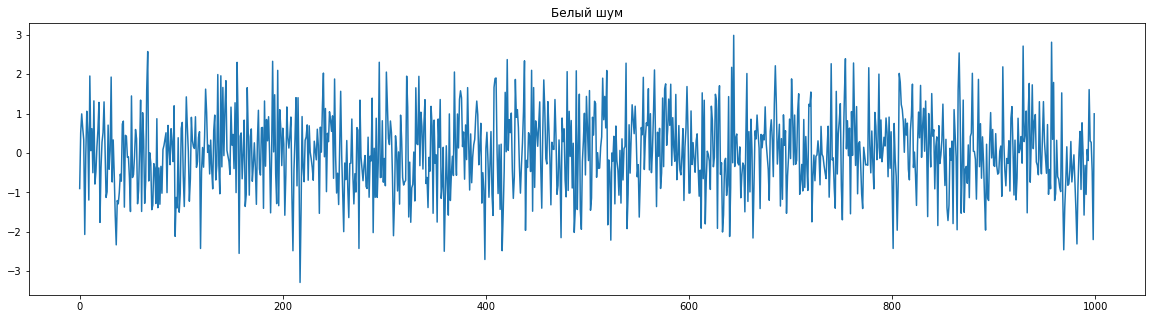

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(white_noise)
plt.title('Белый шум')
plt.show()

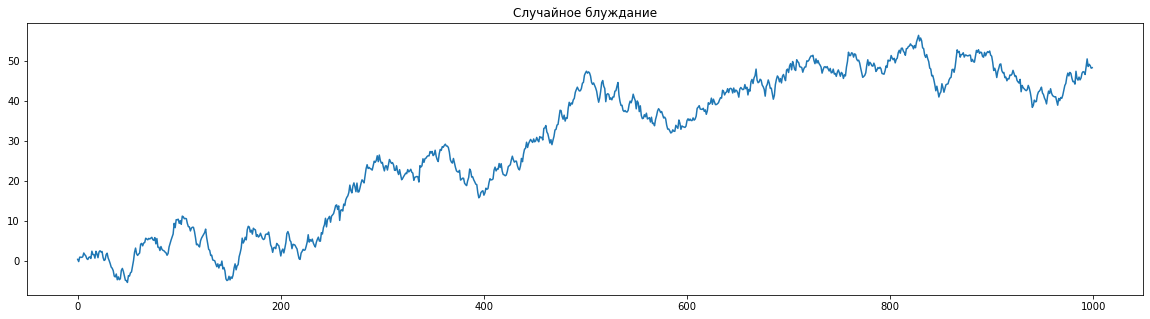

In [18]:
plt.figure(figsize=(20, 5))
plt.plot(random_walk)
plt.title('Случайное блуждание')
plt.show()

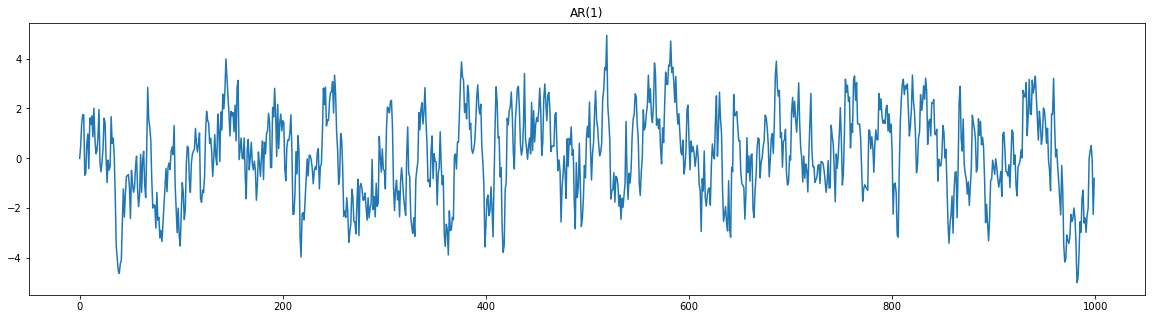

In [19]:
plt.figure(figsize=(20, 5))
plt.plot(ar1)
plt.title('AR(1)')
plt.show()

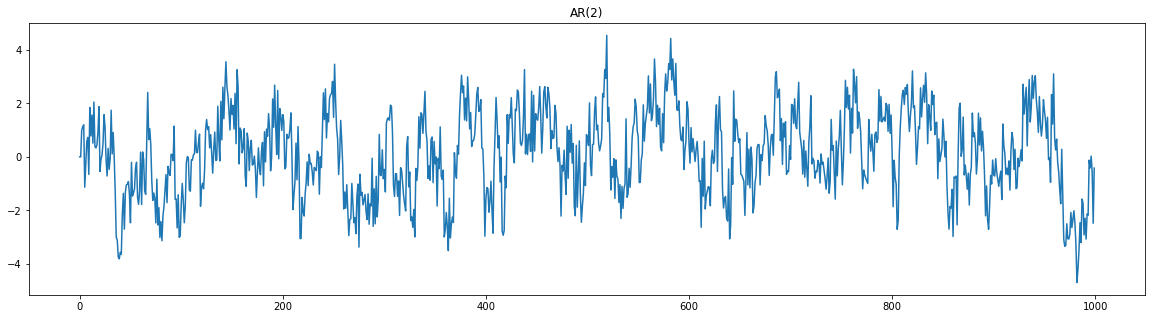

In [20]:
plt.figure(figsize=(20, 5))
plt.plot(ar2)
plt.title('AR(2)')
plt.show()

In [24]:
model = [white_noise, random_walk, ar1, ar2, lorenz]
names = ['Белый шум', 'Случайное блуждание', 'AR(1)', 'AR(2)', 'ряд Лоренца']

In [25]:
print('Тип ряда: математическое ожидание дисперсия')
for data, name in zip(model, names):
    print('%s: %.2f %.2f' % (name, np.mean(data), np.var(data)))

Тип ряда: математическое ожидание дисперсия
Белый шум: 0.02 1.02
Случайное блуждание: 29.33 323.43
AR(1): 0.12 2.98
AR(2): 0.12 2.44
ряд Лоренца: 0.52 0.04


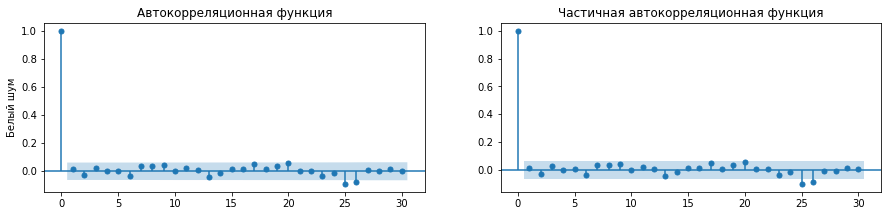

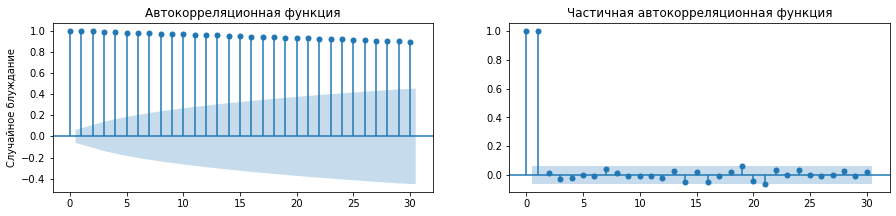

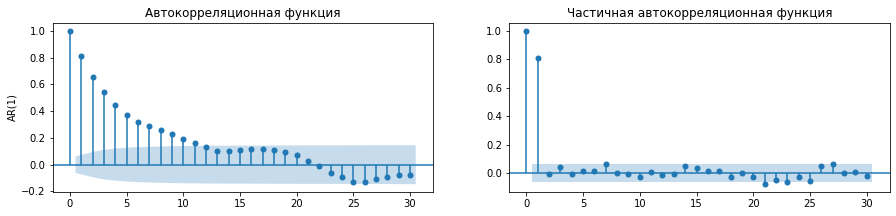

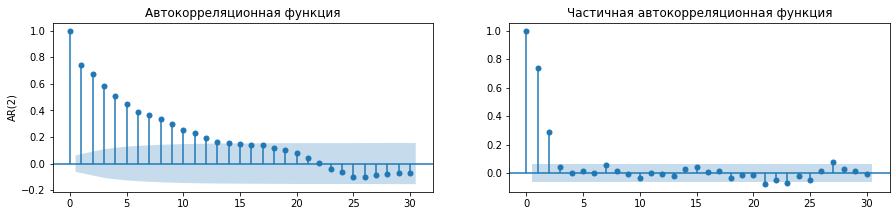

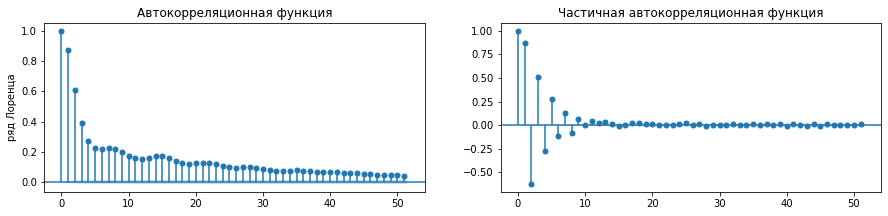

In [27]:
for i, (data, name) in enumerate(zip(model, names)):
    plt.figure(figsize=(15,18))
    s = plt.subplot(len(names), 2, 2*i+1)
    sm.graphics.tsa.plot_acf(data, ax=s, title='Автокорреляционная функция')
    plt.ylabel(name)
    s = plt.subplot(len(names), 2, 2*i+2)
    plt.ylabel('')


    sm.graphics.tsa.plot_pacf(data, ax=s, title='Частичная автокорреляционная функция')